In [2]:
import os
import numpy as np
import cv2
import gc

In [3]:
data = np.load('./data/data_preprocess.npz')


In [4]:
X = data['arr_0']
y = data['arr_1']

In [8]:
X.shape, y.shape


((9959, 100, 100, 3), (9959,))

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))


In [11]:
y_array = y_onehot.toarray()

In [12]:
y_array


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y_array,test_size=0.2,random_state=42)


In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [17]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3), activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(4, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [19]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
266/266 [==============================] - 66s 236ms/step - loss: 0.2144 - accuracy: 0.9213 - val_loss: 0.0736 - val_accuracy: 0.9774
Epoch 2/10
266/266 [==============================] - 63s 237ms/step - loss: 0.0688 - accuracy: 0.9774 - val_loss: 0.0688 - val_accuracy: 0.9789
Epoch 3/10
266/266 [==============================] - 63s 236ms/step - loss: 0.0416 - accuracy: 0.9862 - val_loss: 0.0427 - val_accuracy: 0.9874
Epoch 4/10
266/266 [==============================] - 63s 236ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 0.0376 - val_accuracy: 0.9864
Epoch 5/10
266/266 [==============================] - 67s 254ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0493 - val_accuracy: 0.9880
Epoch 6/10
266/266 [==============================] - 76s 287ms/step - loss: 0.0166 - accuracy: 0.9938 - val_loss: 0.0890 - val_accuracy: 0.9809
Epoch 7/10
266/266 [==============================] - 67s 252ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.0383 - val_ac

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
history_df = pd.DataFrame(history.history)

In [22]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.214422,0.921300,0.073564,0.977410
1,0.068797,0.977407,0.068815,0.978916
2,0.041561,0.986193,0.042675,0.987450
3,0.029157,0.989959,0.037562,0.986446
4,0.018690,0.993724,0.049289,0.987952
5,0.016588,0.993850,0.089016,0.980924
6,0.018256,0.995105,0.038334,0.987952
7,0.006952,0.997239,0.051796,0.987450
8,0.010049,0.996988,0.044219,0.988454
9,0.001612,0.999623,0.055519,0.987450


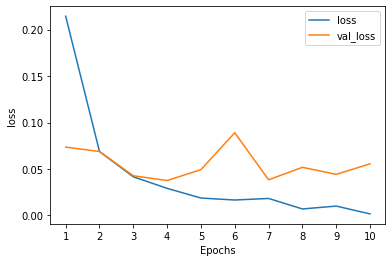

In [23]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

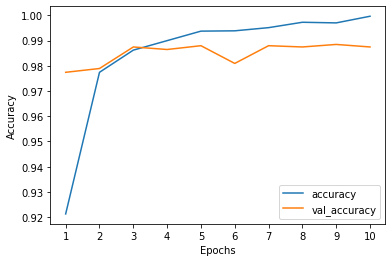

In [24]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [26]:
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


INFO:tensorflow:Assets written to: face_cnn_model\assets


In [25]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]